# We will try a few machines, and see which is the best to use for hyperparamter tuning lets take a look 


In [232]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt



from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

file_path = r"csv_data/dfTrain_Clean.csv"
train_data = pd.read_csv(file_path)


df = train_data

In [233]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin
0,0,3,0,22.0,1,0,7.2500,0,0
1,1,1,1,38.0,1,0,71.2833,1,1
2,1,3,1,26.0,0,0,7.9250,0,0
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,0
887,1,1,1,19.0,0,0,30.0000,0,1
888,0,3,1,21.5,1,2,23.4500,0,0
889,1,1,0,26.0,0,0,30.0000,1,1


In [234]:

# Features: All columns except "Survived"
X = df.drop(columns=["Survived"])  

# Target: "Survived" column
y = df["Survived"]  

#Split data into separate training test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [235]:
#lets look at number of samples and features for X_train & X_test using .shape
X_train.shape, X_test.shape

((712, 8), (179, 8))

In [236]:
X_train.dtypes

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
HasCabin      int64
dtype: object

---
# Random Forest Classifier

In [237]:
# Lets try a Random Forest Classifier 

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


#Lets train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [238]:
#Making predictions 
rf_y_pred = rf_model.predict(X_test)

#Checking the auccuracy
accuracy = accuracy_score(y_test, rf_y_pred)
accuracy_percent = accuracy * 100
print(f"Random Forest Accuracy: {accuracy_percent:.2f}%")

Random Forest Accuracy: 81.56%


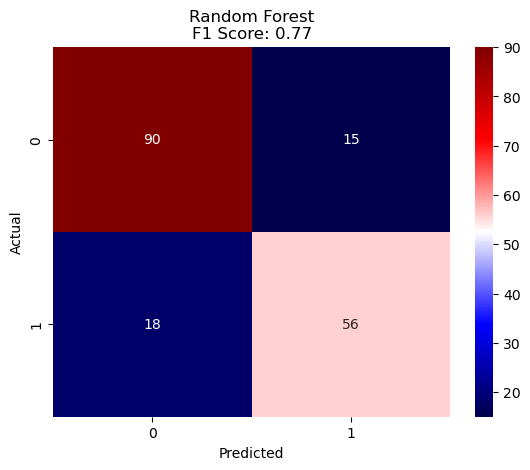

In [259]:
#Confusion Matrix for Random Forest Classifier 

rf_cm = confusion_matrix(y_test,rf_y_pred)
f1_rf = f1_score(y_test, rf_y_pred)
sns.heatmap(rf_cm,annot= True,fmt="d",cmap="seismic")
plt.title(f"Random Forest\nF1 Score: {f1_rf:.2f}")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- True Positive = 90
- True Negative = 56
- False Positive = 15
- False Negative = 18 


In [240]:
# Classification report for RFC
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



---
# Gradient Boosting Classifier

In [241]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [242]:
#Making predictions 
gb_y_pred = gb_model.predict(X_test)

#Checking the auccuracy
accuracy = accuracy_score(y_test, gb_y_pred)
accuracy_percent1 = accuracy * 100
print(f"Gradient Boosting Accuracy: {accuracy_percent:.2f}%")

Gradient Boosting Accuracy: 81.56%


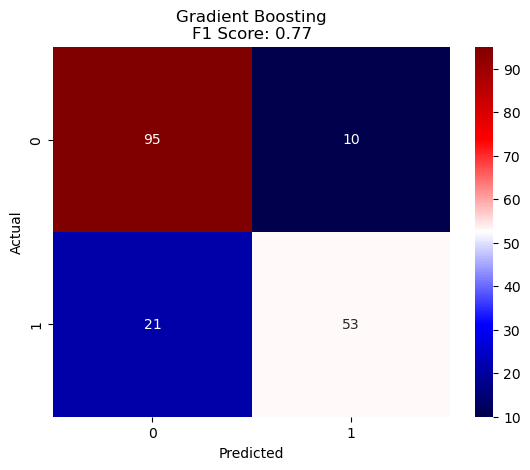

In [243]:
gb_cm = confusion_matrix(y_test,gb_y_pred)
f1_gb = f1_score(y_test, gb_y_pred)
sns.heatmap(gb_cm,annot= True,fmt="d",cmap="seismic")
plt.title(f"Gradient Boosting\nF1 Score: {f1_gb:.2f}")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- True Positive = 95
- True Negative = 53
- False Positive = 10
- False Negative = 21 


In [244]:
# Classification report for GBC
print(classification_report(y_test, gb_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.84      0.72      0.77        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



---
# Logistic Regression 

In [245]:
#LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [246]:
lr_y_pred = lr_model.predict(X_test)

In [247]:
accuracy = accuracy_score(y_test, lr_y_pred)
accuracy_percent = accuracy * 100
print(f"Gradient Boosting Accuracy: {accuracy_percent:.2f}%")

Gradient Boosting Accuracy: 82.12%


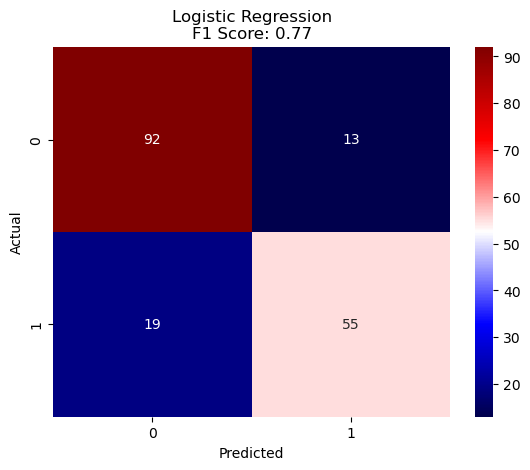

In [248]:
lr_cm = confusion_matrix(y_test,lr_y_pred)
f1_lr = f1_score(y_test, lr_y_pred)
sns.heatmap(lr_cm,annot= True,fmt="d",cmap="seismic")
plt.title(f"Logistic Regression\nF1 Score: {f1_lr:.2f}")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- True Positive = 92
- True Negative = 55
- False Positive = 13
- False Negative = 19 

In [249]:
# Classification report for LR
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



---
# Naive Bayes 

In [250]:

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [251]:
nb_y_pred = nb_model.predict(X_test)

In [252]:
accuracy = accuracy_score(y_test, nb_y_pred)
accuracy_percent = accuracy * 100
print(f"Naive Bayes: {accuracy_percent:.2f}%")

Naive Bayes: 78.21%


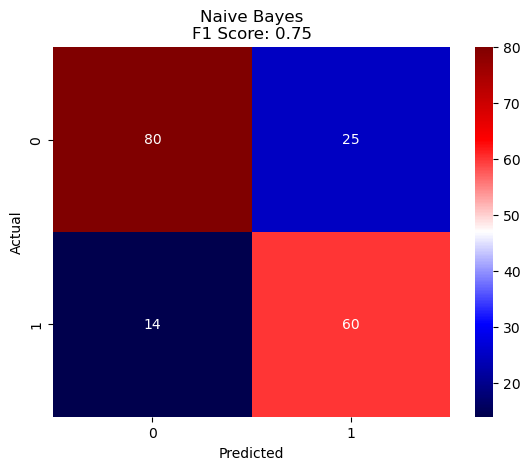

In [253]:
nb_cm = confusion_matrix(y_test,nb_y_pred)
f1_nb = f1_score(y_test, nb_y_pred)
sns.heatmap(nb_cm,annot= True,fmt="d",cmap="seismic")
plt.title(f"Naive Bayes\nF1 Score: {f1_nb:.2f}")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- True Positive = 80
- True Negative = 60
- False Positive = 25
- False Negative = 14

In [254]:
# Classification report for NB
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       105
           1       0.71      0.81      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.79      0.78      0.78       179



---
# Lets show the AUC for all the machines and see which is the best 

Logistic Regression AUC: 88.65%
Naive Bayes AUC: 85.73%
Gradient Boosting AUC: 88.29%
Random Forest AUC: 89.63%


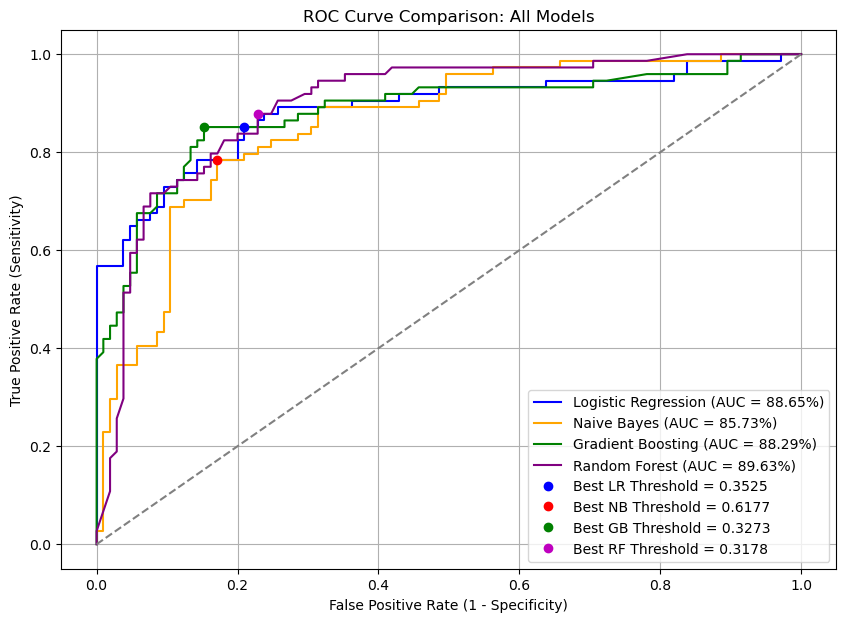

In [255]:
# Logistic Regression Probabilities
y_prob_lr = lr_model.predict_proba(X_test)[:,1]

# ROC for Logistic Regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
youden_j_lr = tpr_lr - fpr_lr
best_index_lr = youden_j_lr.argmax()
best_threshold_lr = thresholds_lr[best_index_lr]
best_fpr_lr = fpr_lr[best_index_lr]
best_tpr_lr = tpr_lr[best_index_lr]
roc_auc_lr = auc(fpr_lr, tpr_lr) * 100  # convert to percent

# Naive Bayes Probabilities
y_prob_nb = nb_model.predict_proba(X_test)[:,1]

# ROC for Naive Bayes
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_prob_nb)
youden_j_nb = tpr_nb - fpr_nb
best_index_nb = youden_j_nb.argmax()
best_threshold_nb = thresholds_nb[best_index_nb]
best_fpr_nb = fpr_nb[best_index_nb]
best_tpr_nb = tpr_nb[best_index_nb]
roc_auc_nb = auc(fpr_nb, tpr_nb) * 100  # convert to percent

# Gradient Boosting Probabilities
y_prob_gb = gb_model.predict_proba(X_test)[:,1]

# ROC for Gradient Boosting
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_prob_gb)
youden_j_gb = tpr_gb - fpr_gb
best_index_gb = youden_j_gb.argmax()
best_threshold_gb = thresholds_gb[best_index_gb]
best_fpr_gb = fpr_gb[best_index_gb]
best_tpr_gb = tpr_gb[best_index_gb]
roc_auc_gb = auc(fpr_gb, tpr_gb) * 100  # convert to percent

# Random Forest Probabilities
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

# ROC for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
youden_j_rf = tpr_rf - fpr_rf
best_index_rf = youden_j_rf.argmax()
best_threshold_rf = thresholds_rf[best_index_rf]
best_fpr_rf = fpr_rf[best_index_rf]
best_tpr_rf = tpr_rf[best_index_rf]
roc_auc_rf = auc(fpr_rf, tpr_rf) * 100  # convert to percent

# Print AUCs in percent
print(f"Logistic Regression AUC: {roc_auc_lr:.2f}%")
print(f"Naive Bayes AUC: {roc_auc_nb:.2f}%")
print(f"Gradient Boosting AUC: {roc_auc_gb:.2f}%")
print(f"Random Forest AUC: {roc_auc_rf:.2f}%")

# Plot ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f}%)", color="blue")
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {roc_auc_nb:.2f}%)", color="orange")
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {roc_auc_gb:.2f}%)", color="green")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f}%)", color="purple")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Best threshold markers
plt.plot(best_fpr_lr, best_tpr_lr, 'bo', label=f"Best LR Threshold = {best_threshold_lr:.4f}")
plt.plot(best_fpr_nb, best_tpr_nb, 'ro', label=f"Best NB Threshold = {best_threshold_nb:.4f}")
plt.plot(best_fpr_gb, best_tpr_gb, 'go', label=f"Best GB Threshold = {best_threshold_gb:.4f}")
plt.plot(best_fpr_rf, best_tpr_rf, 'mo', label=f"Best RF Threshold = {best_threshold_rf:.4f}")

plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve Comparison: All Models")
plt.legend()
plt.grid()
plt.show()


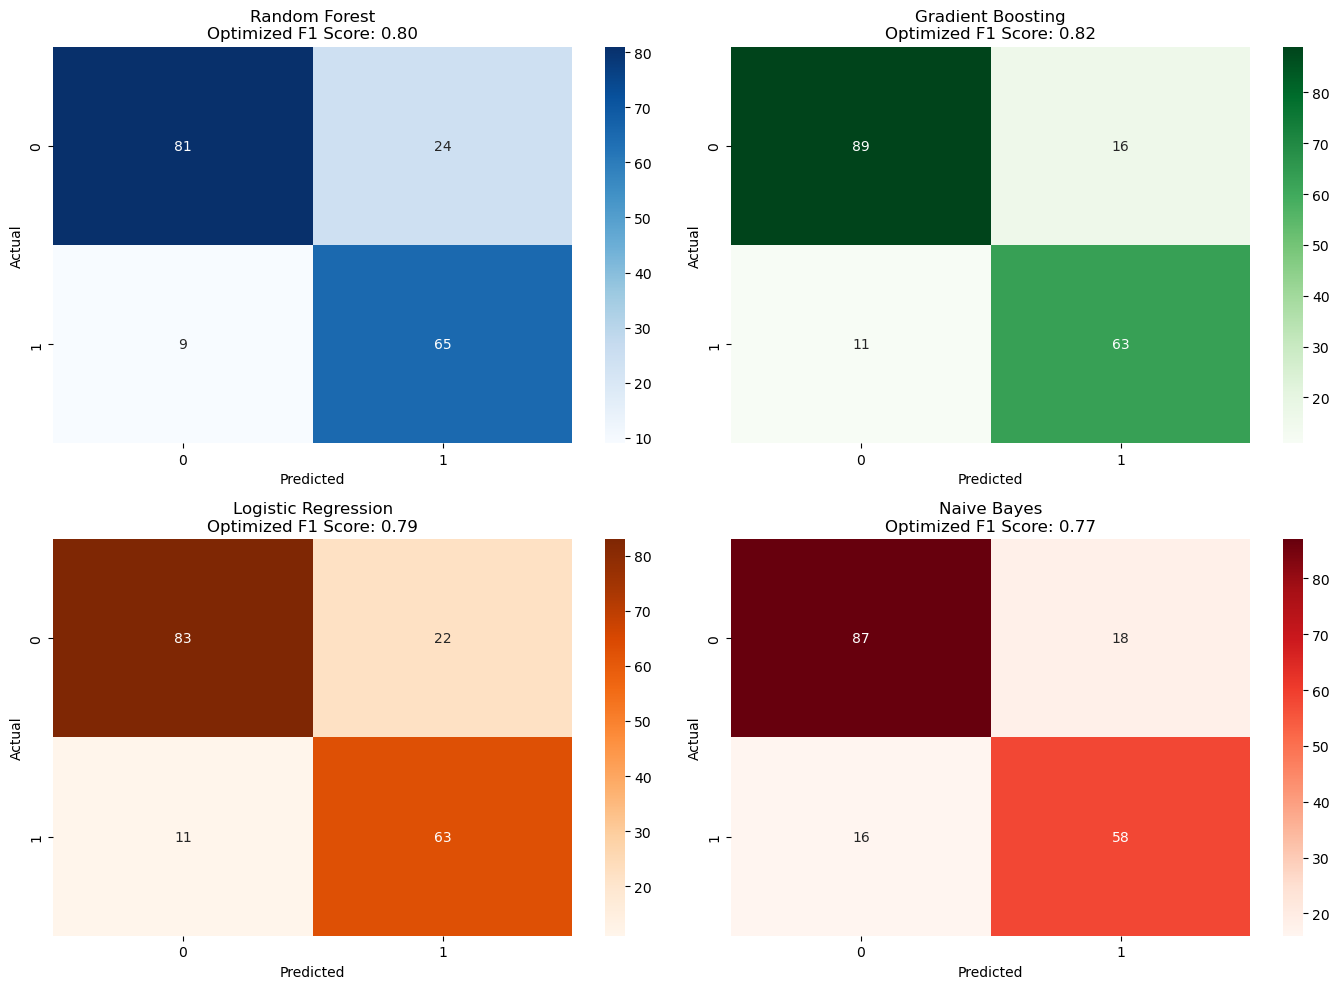

In [256]:


# Create thresholded predictions
y_pred_rf_thresh = (y_prob_rf >= best_threshold_rf).astype(int)
y_pred_gb_thresh = (y_prob_gb >= best_threshold_gb).astype(int)
y_pred_lr_thresh = (y_prob_lr >= best_threshold_lr).astype(int)
y_pred_nb_thresh = (y_prob_nb >= best_threshold_nb).astype(int)

# Generate confusion matrices with the best thresholds
cm_rf = confusion_matrix(y_test, y_pred_rf_thresh)
cm_gb = confusion_matrix(y_test, y_pred_gb_thresh)
cm_lr = confusion_matrix(y_test, y_pred_lr_thresh)
cm_nb = confusion_matrix(y_test, y_pred_nb_thresh)

# Compute F1 scores
optf1_rf = f1_score(y_test, y_pred_rf_thresh)
optf1_gb = f1_score(y_test, y_pred_gb_thresh)
optf1_lr = f1_score(y_test, y_pred_lr_thresh)
optf1_nb = f1_score(y_test, y_pred_nb_thresh)

# Plot side-by-side confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", ax=axes[0, 0])
axes[0, 0].set_title(f"Random Forest\nOptimized F1 Score: {optf1_rf:.2f}")
axes[0, 0].set_xlabel("Predicted")
axes[0, 0].set_ylabel("Actual")

sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Greens", ax=axes[0, 1])
axes[0, 1].set_title(f"Gradient Boosting\nOptimized F1 Score: {optf1_gb:.2f}")
axes[0, 1].set_xlabel("Predicted")
axes[0, 1].set_ylabel("Actual")

sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Oranges", ax=axes[1, 0])
axes[1, 0].set_title(f"Logistic Regression\nOptimized F1 Score: {optf1_lr:.2f}")
axes[1, 0].set_xlabel("Predicted")
axes[1, 0].set_ylabel("Actual")

sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Reds", ax=axes[1, 1])
axes[1, 1].set_title(f"Naive Bayes\nOptimized F1 Score: {optf1_nb:.2f}")
axes[1, 1].set_xlabel("Predicted")
axes[1, 1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [260]:
#Lets compare the f1 scores (initial & optimized)for each machine in
models = ['Random Forest', 'Gradient Boosting', 'Logistic Regression', 'Naive Bayes']
initial_scores = [f1_rf, f1_gb, f1_lr, f1_nb]
optimized_scores = [optf1_rf, optf1_gb, optf1_lr, optf1_nb]

print("F1 Scores Summary:\n")
for model, init, opt in zip(models, initial_scores, optimized_scores):
    print(f"{model}: Initial = {init:.4f}, Optimized = {opt:.4f}")


F1 Scores Summary:

Random Forest: Initial = 0.7724, Optimized = 0.7975
Gradient Boosting: Initial = 0.7737, Optimized = 0.8235
Logistic Regression: Initial = 0.7746, Optimized = 0.7925
Naive Bayes: Initial = 0.7547, Optimized = 0.7733


---
Taking a look at everything to see which machine we will go with for hyper paramater tuning 

| Model                   | Initial F1  | Optimized F1   | AUC (%)     | Notes                                              |
| ----------------------- | ----------- | -------------- | ----------- | -------------------------------------------------- |
| **Random Forest**       | Medium      | Higher         | **Highest** | Best AUC (ranking), improved with threshold tuning |
| **Gradient Boosting**   | **Highest** | **Still high** | High        | Best **initial** F1 and accuracy                   |
| **Logistic Regression** | Good        | Improved       | Moderate    | Linear, but less powerful                          |
| **Naive Bayes**         | Lowest      | Still low      | Lowest      | Lightweight but underperforms                      |


# We will go with GradientBoostingClassier for hyper parameter tuning 

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.

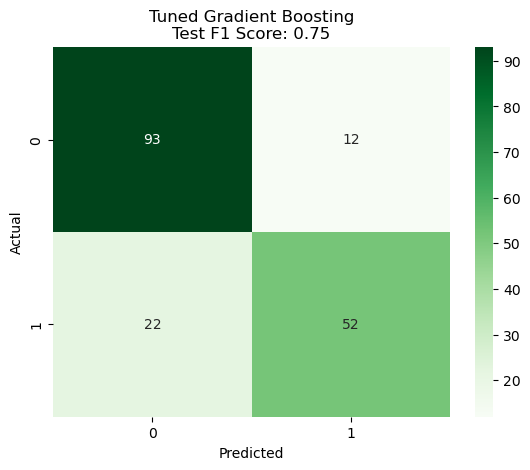

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 50, 'subsample': 0.8}
Best F1 Score: 0.7545085638998682


In [262]:
#hyper parameter tuning using GridSeachCV

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define base model
gb_model = GradientBoostingClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    scoring='f1',  # Use 'roc_auc' or 'accuracy' depending on your goal
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all processors
    verbose=2
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Evaluate the best estimator on the test set
best_gb_model = grid_search.best_estimator_
y_pred_gb_best = best_gb_model.predict(X_test)

# Calculate F1 score on test set
final_f1_score = f1_score(y_test, y_pred_gb_best)
print(f"Final Test F1 Score of Tuned Gradient Boosting: {final_f1_score:.4f}")

# Optional: plot confusion matrix
cm_best_gb = confusion_matrix(y_test, y_pred_gb_best)
sns.heatmap(cm_best_gb, annot=True, fmt="d", cmap="Greens")
plt.title(f"Tuned Gradient Boosting\nTest F1 Score: {final_f1_score:.2f}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Best estimator and parameters
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)
